#compare different approaches

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# compare with PCA
metrics_pca =       pd.read_csv('metrics_PCA.csv')
#metrics_kpca =      pd.read_csv('metrics_KernelPCA.csv')
metrics_pca_sk =    pd.read_csv('metrics_PCA_sk.csv')
metrics_kpca_sk =   pd.read_csv('metrics_KernelPCA_sk.csv')
metrics_MDS =       pd.read_csv('metrics_MDS.csv')

,PCs,PCA_accuracy,PCA_mutual_info
0,PC1,0.6115,0.468217
1,PC2,0.6395,0.517344
2,PC3,0.8470,1.002142
3,PC4,0.9310,1.151288
4,PC5,0.9430,1.180709
5,PC6,0.9530,1.210848
6,PC7,0.9550,1.216061
7,PC8,0.9695,1.252961
8,PC9,0.9700,1.255803
9,PC10,0.9765,1.276425


In [16]:
accuracy = metrics_pca[['PCs', 'PCA_accuracy']]
#accuracy['KPCA_accuracy'] =   metrics_kpca['KPCA_accuracy'] 
accuracy['PCA_sk_accuracy'] =   metrics_pca_sk['PCA_sk_accuracy'] 
accuracy['KPCA_sk_accuracy'] =  metrics_kpca_sk['KPCA_sk_accuracy'] 
accuracy['MDS_accuracy'] =  metrics_MDS['MDS_accuracy'] 



In [17]:
mi = metrics_pca[['PCs', 'PCA_mutual_info']]
#accuracy['KPCA_accuracy'] =   metrics_kpca['KPCA_accuracy'] 
mi['PCA_sk_mutual_info'] =   metrics_pca_sk['PCA_sk_mutual_info'] 
mi['KPCA_sk_mutual_info'] =  metrics_kpca_sk['KPCA_sk_mutual_info'] 
mi['MDS_mutual_info'] =  metrics_MDS['MDS_mutual_info'] 

mi

,PCs,PCA_mutual_info,PCA_sk_mutual_info,KPCA_sk_mutual_info,MDS_mutual_info
0,PC1,0.468217,0.468217,0.676617,0.340925
1,PC2,0.517344,0.517344,1.043983,0.547578
2,PC3,1.002142,1.002142,1.145121,0.961334
3,PC4,1.151288,1.151288,1.171495,1.074708
4,PC5,1.180709,1.180709,1.207864,1.109248
5,PC6,1.210848,1.210848,1.205606,1.128974
6,PC7,1.216061,1.216061,1.232815,1.170647
7,PC8,1.252961,1.252961,1.241569,1.170647
8,PC9,1.255803,1.255803,1.264233,1.190304
9,PC10,1.276425,1.276425,1.265513,1.213172


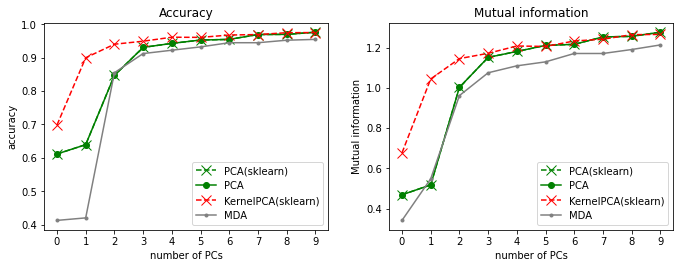

In [22]:
pcs = [str(i) for i in range(accuracy.shape[0])]
handles=[ 'PCA(sklearn)','PCA', 'KernelPCA(sklearn)', "MDA"]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.tight_layout(pad=3)

ax[0].plot(pcs, accuracy.PCA_sk_accuracy,    color='green', marker='x', markersize=10, linestyle='dashed')
ax[0].plot(pcs, accuracy.PCA_accuracy,  color='green', marker='o')
ax[0].plot(pcs, accuracy.KPCA_sk_accuracy,    color='red', marker='x', markersize=10, linestyle='dashed')
ax[0].plot(pcs, accuracy.MDS_accuracy,    color='gray', marker='.')
#ax[0].plot(pcs, accuracy.KPCA_accuracy,    color='red', marker='o')

ax[0].set(title='Accuracy', ylabel='accuracy', xlabel='number of PCs')
ax[0].legend(handles)

ax[1].plot(pcs, mi.PCA_sk_mutual_info,    color='green', marker='x', markersize=10, linestyle='dashed')
ax[1].plot(pcs, mi.PCA_mutual_info,  color='green', marker='o')
ax[1].plot(pcs, mi.KPCA_sk_mutual_info,    color='red', marker='x', markersize=10, linestyle='dashed')
ax[1].plot(pcs, mi.MDS_mutual_info,    color='gray', marker='.')
#ax[1].plot(pcs, mi.KPCA_mutual_info,    color='red', marker='o')
ax[1].set(title='Mutual information', ylabel='Mutual information', xlabel='number of PCs')
ax[1].legend(handles)
plt.show()